In [1]:
import numpy as np
import matplotlib.pyplot as plt

# setting numpy random seed for consistency

np.random.seed(1234)

In [2]:

# Test function 1: Convex 2d- Quadratic
n_dim = 2
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(b,x)

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return np.dot(A,x) - b





# Question 1:

Assume you are given access to the value and gradient oracles. (Two examples for testing given above called f1 and f2). You are allowed to access the function only through these oracles. 

1. Complete the code for gradient descent with different step size schemes. (one of them given for free)

2. On f1, plot the the error vs iteration and trajectory plots for constant step sizes with the following values of eta: [0.1, 0.2, 0.23]. (20 Iterations should be sufficient)

3. On f1, Plot the error vs iteration and trajectory plots for AG and FR rules. (20 Iterations should be sufficient)

4. On f2, plot the the error vs iteration and trajectory plots for constant step size eta=1.5 with three different random initialisations drawn from N(0,0.01).  (20 Iterations should be sufficient)

5. On f2, Plot the error vs iteration and trajectory plots for AG and FR rules for one random initialisation from N(0,0.01). (20 Iterations should be sufficient)

6. Create a Markdown cell and give your findings for questions 2 and 3 above in them in an itemised list. (For this you may look at the function definitions in the oracle to get an idea).


In [3]:
# Question 1 part 1

def gradient_descent_update(x, eta=1.):
    """
    Arguments:
    x: 1 dimensional numpy array as input. Representing x_t
    eta: step size
    
    Returns:
    x_next: 1-dimensional numpy array with same shape as x. 
    Representing one Gradient descent step with constant step size eta.. 
    
    Notes:
    You are allowed ONLY ONE get_gradient call in this function.
    """
    grad = get_gradient(x)
    return x-eta*grad


def gradient_descent_update_AG(x, c=0.25, c_dash=0.5):
    """
    Arguments:
    x: 1 dimensional numpy array as input. Representing x_t
    c: optional parameter for specifying AG rules. (Upper bound line)
    c_dash: optional parameter for specifying AG rules. (Lower bound line)
    
    Returns:
    x_next: 1-dimensional numpy array with same shape as x. 
    Representing one Gradient descent step with step size given by AG conditions. 
    
    Notes:
    You are allowed ONLY ONE get_gradient calls in this function.
    """
    
    # obtaining gradient and function value at x
    grad_x = get_gradient(x)
    val_x = get_value(x)
    grad_x_norm = np.dot(grad_x, grad_x)
    
    # initialize eta
    eta = 1
    
    # perform one iteration of search for eta
    x_next = x - eta*grad_x
    
    # searching for eta which satisfies AG conditions
    while not( 
        (get_value(x_next) >= val_x - c_dash*eta*grad_x_norm)
        and (get_value(x_next) <= val_x - c*eta*grad_x_norm)):
        
        # check if eta is too small
        if get_value(x_next) < val_x - c_dash*eta*grad_x_norm:
            eta_prev = eta
            # increase eta
            eta = 2*eta
            # find next x
            x_next = x - eta*grad_x
            # check if eta is now too large, if so take average
            if get_value(x_next) > val_x - c*eta*grad_x_norm:
                eta = (eta_prev + eta)/2
                x_next = x - eta*grad_x
            
            
        # alternately, if eta is too large
        elif get_value(x_next) > val_x - c*eta*grad_x_norm:
            eta_prev = eta
            # decrease eta
            eta = eta/2
            # find enxt x
            x_next = x - eta*grad_x
            # if eta is too small
            if get_value(x_next) < val_x - c_dash*eta*grad_x_norm:
                eta = (eta_prev + eta)/2
                x_next = x - eta*grad_x
    
    return x_next
                

def gradient_descent_update_FR(x, tol=1e-5):
    """
    Arguments:
    x : 1 dimensional numpy array as input. Representing x_t
    tol : tolerance parameter.
    
    Returns:
    x_next: 1-dimensional numpy array with same shape as x. 
    Representing next iterate of Gradient descent step with step size given by full relaxation. 
    You may stop when the line search optimisation problem is solved to a tolerance given by tol.
    
    Notes:
    You are allowed a FEW get_gradient calls in this function. But be careful not to go overboard.
    """
    
    # obtaining gradient and function value at x
    grad_x = get_gradient(x)
    val_x = get_value(x)
    
    # initialize eta_low and eta_high 
    eta_low = 1
    eta_high = 1
    
    # ensure eta_low is low enough
    x_next_low = x - eta_low*grad_x
    grad_x_next_low = get_gradient(x_next_low)
    while (np.dot(grad_x_next_low, grad_x) < 0):
        eta_low = eta_low/2
        x_next_low = x - eta_low*grad_x
        grad_x_next_low = get_gradient(x_next_low)
    
    # ensure eta_high is high enough
    x_next_high = x - eta_high*grad_x
    grad_x_next_high = get_gradient(x_next_high)
    while (np.dot(grad_x_next_high, grad_x) > 0):
        eta_high = eta_high*2
        x_next_high = x - eta_high*grad_x
        grad_x_next_high = get_gradient(x_next_high)


    # binary search for eta
    
    # compute one xnext
    eta = (eta_low + eta_high)/2
    x_next = x - eta*grad_x
    grad_x_next = get_gradient(x_next)
    
    while np.abs(np.dot(grad_x_next, grad_x)) > tol:
        # if eta is too small (descent directions have component along -grad(x))
        if (np.dot(grad_x_next, grad_x) > 0):
            eta_low = eta
            eta = (eta_low + eta_high)/2
            x_next = x - eta*grad_x
            grad_x_next = get_gradient(x_next)
            
        # if eta is too large
        if (np.dot(grad_x_next,grad_x) < 0):
            eta_high = eta
            eta = (eta_low + eta_high)/2
            x_next = x - eta*grad_x
            grad_x_next = get_gradient(x_next)
    
    return x_next
    

In [4]:
###### Plot / Utility functions

def plot_error_vs_iteration(f_vals, plt_title=None):
    # Plot the loss vs iteration number
    # Argument f_vals is (n)-shape numpy array
    
    plt.figure()

    if plt_title is None:
        plt.title('Function value vs Iteration')
    else:
        plt.title(plt_title)

    plt.xlabel('Iteration : t ')
    plt.ylabel('Value : $f(x_t)$')
    plt.grid(True)
    plt.plot(f_vals)


def plot_trajectory(x_list, x_axis=None, y_axis=None, plt_title=None):
    # Trajectory plot for the special case of 2-d functions
    # Generating contour maps of function
    
    # Argument x_list is n by 2 numpy array giving n iterates in 2d. 
    
    delta=0.025
    if x_axis is None:
        x_axis = np.arange(np.min(x_list[:,0])-0.5, np.max(x_list[:,0])+0.5 , delta)
    if y_axis is None:
        y_axis = np.arange(np.min(x_list[:,1])-0.5, np.max(x_list[:,1])+0.5 , delta)

    X, Y = np.meshgrid(x_axis, y_axis)

    Z = np.zeros(X.shape)

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            input_vec = np.array([X[i,j],Y[i,j]])
            Z[i,j] = get_value(input_vec) 

    levels = np.linspace(Z.min(), Z.max(), 50)

    
    plt.figure(figsize=(10,10.*Z.shape[0]/Z.shape[1]))
    if plt_title is None:
        plt.title('Gradient Descent iterate trajectory')
    else:
        plt.title(plt_title)
        
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.contourf(X, Y, Z, levels=levels, cmap="viridis")
    plt.colorbar()
    # Plot the trajectory
    plt.plot(x_list[:,0],x_list[:,1], marker='o', markersize=10, lw=5)



    

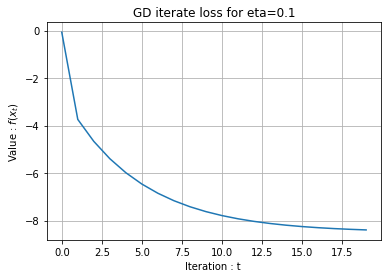

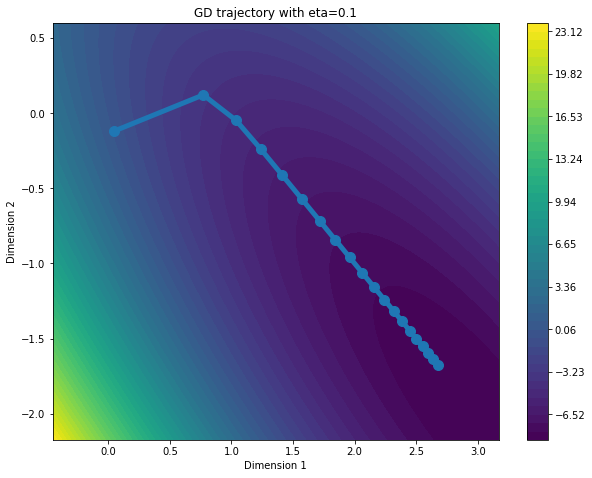

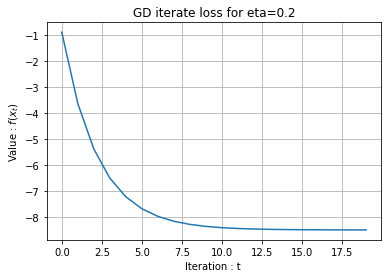

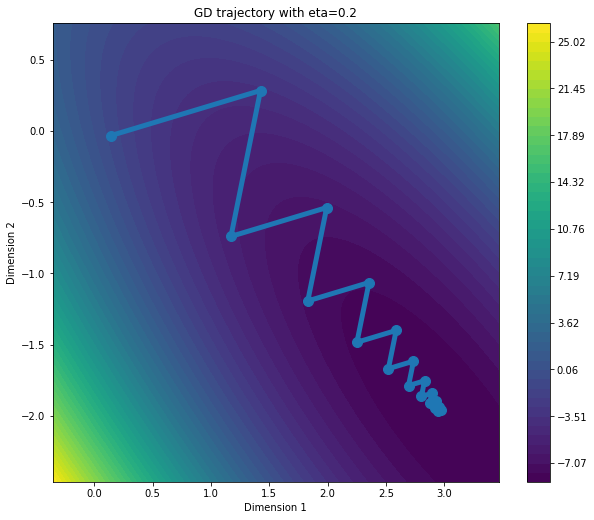

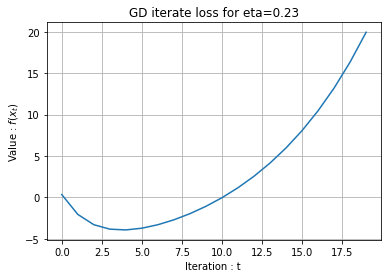

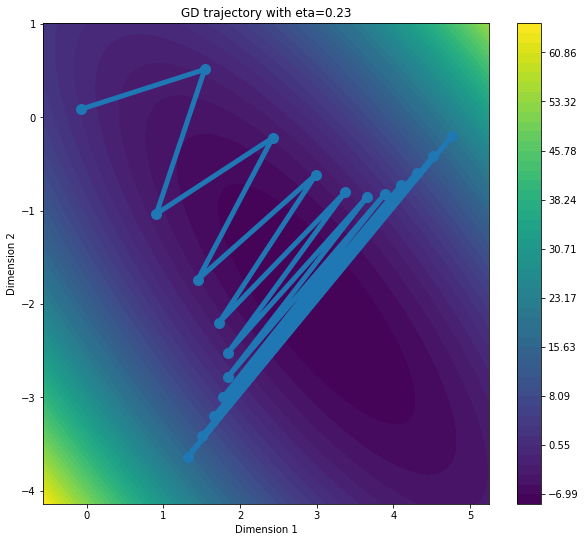

In [5]:
# Question 1 part 2:

for eta in [0.1, 0.2, 0.23]:
    f_vals=[]
    x_list=[]
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):

        x_list.append(x)
        f_vals.append(get_value(x))
        x = gradient_descent_update(x=x, eta=eta)
    x_list = np.array(x_list)


    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for eta='+str(eta))
    
    # checking final solution
#     print("final iterate:", x_list[-1])

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with eta='+str(eta))
    

Testing orthogonality of successive descent directions for FR 

Iteration: 1 
Inner product of descent directions:  -2.513872777548297e-07
Iteration: 2 
Inner product of descent directions:  -3.88838763149664e-07
Iteration: 3 
Inner product of descent directions:  -5.262903487443411e-07
Iteration: 4 
Inner product of descent directions:  5.949910150383771e-07
Iteration: 5 
Inner product of descent directions:  3.851566197777956e-06
Iteration: 6 
Inner product of descent directions:  1.2143167608556632e-05
Iteration: 7 
Inner product of descent directions:  3.3525815530027764e-06
Iteration: 8 
Inner product of descent directions:  5.4986074975152536e-05
Iteration: 9 
Inner product of descent directions:  4.136791625260991e-06
Iteration: 10 
Inner product of descent directions:  3.385959772955061e-05
Iteration: 11 
Inner product of descent directions:  6.358052125643951e-05
Iteration: 12 
Inner product of descent directions:  -0.00022890253551270136
Iteration: 13 
Inner product of descen

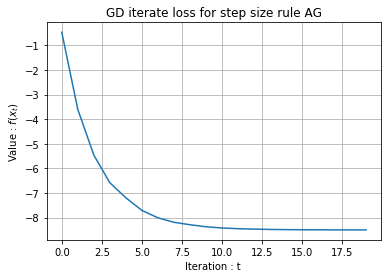

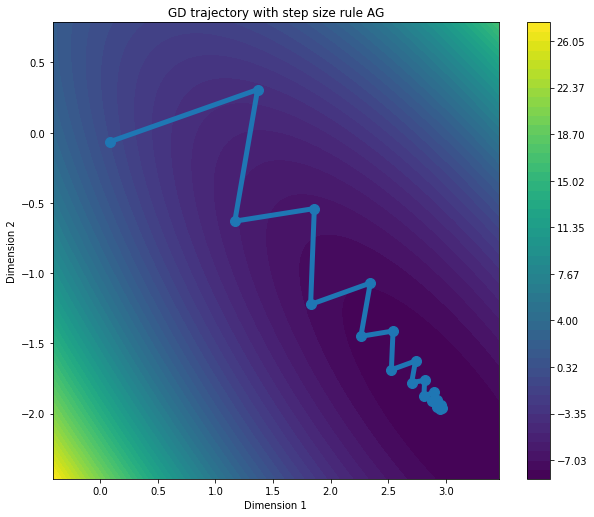

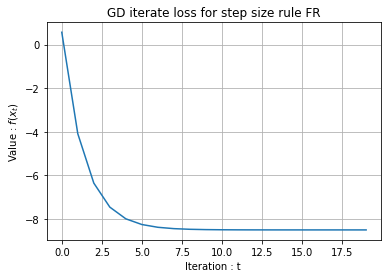

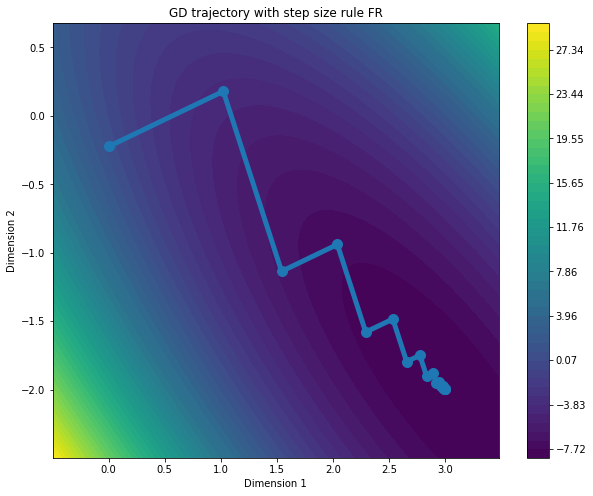

In [6]:
# Question 1 part 3:
for stepsize_rule in ['AG', 'FR']:
    f_vals=[]
    x_list=[]
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):

        x_list.append(x)
        f_vals.append(get_value(x))
        if stepsize_rule=='AG':
            x = gradient_descent_update_AG(x=x) # , eta=eta) AG does not require argument eta!
        elif stepsize_rule=='FR':
            x = gradient_descent_update_FR(x=x) # , eta=eta) FR does not require argument eta
            
    x_list = np.array(x_list)
    
    # code to test orthogonality of x_t+1 - x_t and x_t - x_t-1

    if stepsize_rule == "FR":
        print("Testing orthogonality of successive descent directions for FR \n")
        for i in range(1,len(x_list)-1):
            prev = x_list[i]- x_list[i-1]
            after = x_list[i+1] - x_list[i]
            print("Iteration: "+ str(i), "\nInner product of descent directions: ", np.dot(prev,after)/np.linalg.norm(prev)/np.linalg.norm(after))
    

    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for step size rule '+stepsize_rule)

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with step size rule '+ stepsize_rule)
    

In [7]:
# Test function 2: Non-convex 2d- function with 2 local minima
n_dim=2
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    p1=np.array([0,0.5])
    p2=np.array([-0.5,0])
    g=np.array([0.01,0.01])
    
    return (np.linalg.norm(x-p1)**2)*(np.linalg.norm(x-p2)**2)+ np.dot(g,x) 

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    p1=np.array([0,0.5])
    p2=np.array([-0.5,0])
    g=np.array([0.01,0.01])

    term1= 2*(np.linalg.norm(x-p1)**2)*(x-p2)
    term2= 2*(np.linalg.norm(x-p2)**2)*(x-p1)    
    
    
    return term1+term2+g


## Note: The next cell needs to be run a few times before the solution converges for the chosen seed value. At other times, the code throws up an error. 

/home/milind/miniconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/milind/miniconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract
/home/milind/miniconda3/envs/tf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: arange: cannot compute length

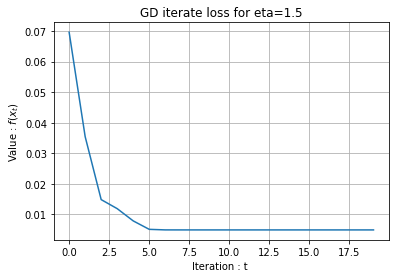

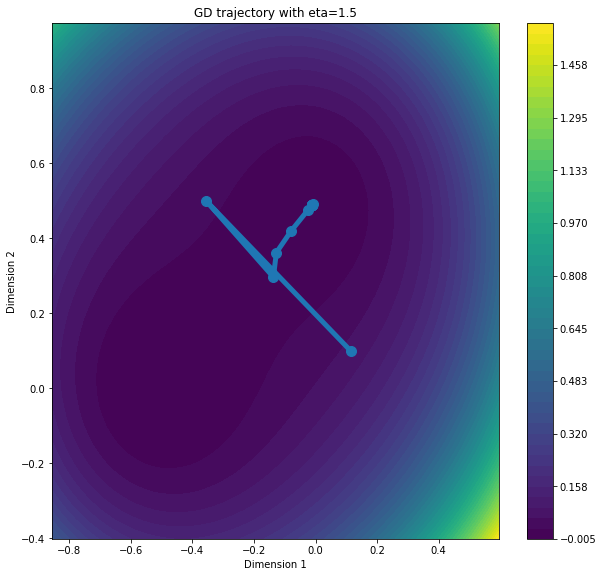

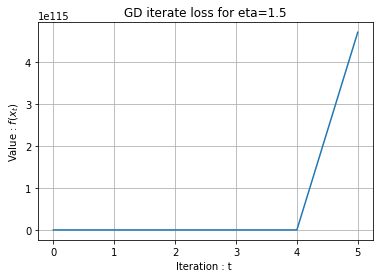

In [8]:
# Question 1, part 4

for eta in [1.5, 1.5, 1.5]:
    f_vals=[]
    x_list=[]
    x=np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):
        x_list.append(x)
        f_vals.append(get_value(x))
        x = gradient_descent_update(x=x, eta=eta)
    x_list = np.array(x_list)
#     print(x_list)


    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for eta='+str(eta))

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with eta='+str(eta))
    

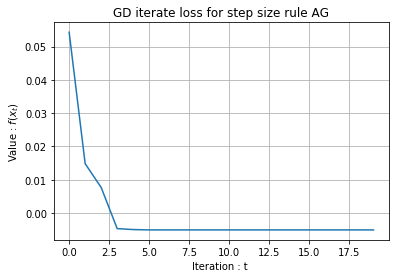

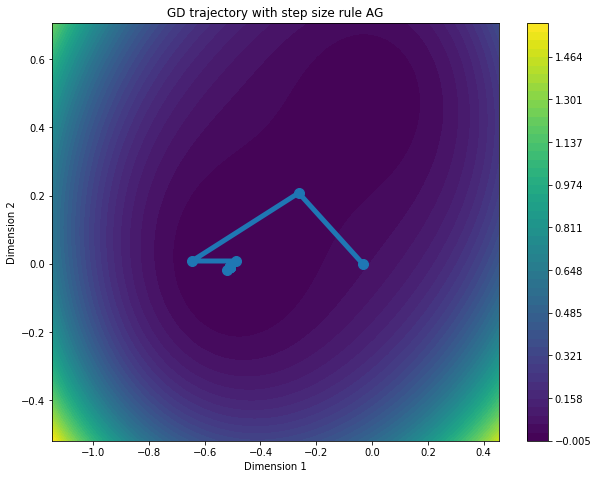

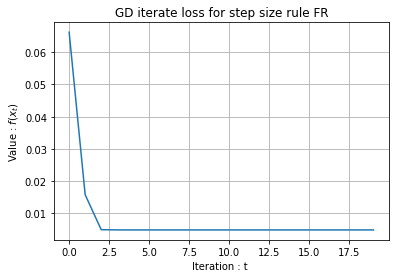

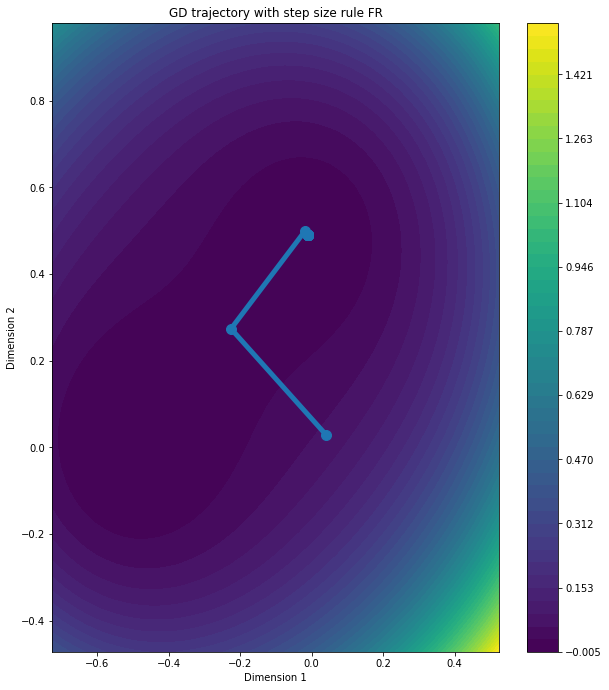

In [9]:
# Question 1 part 5:
for stepsize_rule in ['AG', 'FR']:
    f_vals=[]
    x_list=[]
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):

        x_list.append(x)
        f_vals.append(get_value(x))
        if stepsize_rule=='AG':
            x = gradient_descent_update_AG(x=x) # , eta=eta), eta is not a necessary argument
        elif stepsize_rule=='FR':
            x = gradient_descent_update_FR(x=x) # , eta=eta), eta is not a necessary argument 
            
    x_list = np.array(x_list)


    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for step size rule '+stepsize_rule)
    
    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with step size rule '+ stepsize_rule)

### Question 1 part 6

- The function given (f1) is convex (statement of the question) and therefore has a single optimum. The optimum occurs at (-3,2). This can be seen both theoretically and from the results obtained above.
- Gradient descent with constant step size can converge or diverge depending on the step size chosen. 
- For a small value of eta, i.e 0.1, there are nearly no oscillations. However, the steps are smaller and consequently the algorithm does not converge to the optimum (3,-2) in 20 iterations. For an eta of 0.2 the steps are larger, there are more oscillations and the final iterate is closer to the optimum. For an eta of 0.23 the step size is too large and consecutive iterates grow farther and farther from the final solution.
- For the given quadratic function f1, a theoretical analysis can be used to determine the threshold for eta beyond which gradient descent diverges.

The gradient descent equation is

\begin{equation}
x_{t+1} = x_t - \eta*\nabla f(x_t)
\end{equation}

For 
\begin{equation}
f(x) = \frac{1}{2}x^T A x - b^T x
\end{equation}

the gradient is given as 

\begin{equation}
\nabla f(x) = Ax - b
\end{equation}

Therefore the gradient descent update can be simplified as 

\begin{align}
x_{t+1} &= x_t - \eta*\nabla f(x_t)\\
    &= x_t - \eta*(Ax_t - b)\\
    &= (I - \eta A)x_t + \eta b\\
    &= (I - \eta A)^{t+1}x_0 + (I + (I-\eta A) + ... + (I - \eta A)^t) \eta b\\
\end{align}

Using EVD for A

\begin{align}
A &= 
\begin{bmatrix}
5 & 4 \\
4 & 5
\end{bmatrix} \\
& = U\Lambda U^T \\
& = \frac{1}{2} 
\begin{bmatrix}
1 & -1 \\
1 & 1
\end{bmatrix}
\begin{bmatrix}
9 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\
-1 & 1
\end{bmatrix}
\end{align}

Therefore $x_{t+1}$ can be written as 

\begin{align}
x_{t+1} = U(I - \eta \Lambda)^{t+1} U^T x_0 + U (I + (I - \eta \Lambda) + ... + (I - \eta \Lambda)^t)U^T \eta b
\end{align}

For $x_{t+1}$ to converge, the following summations need to converge

\begin{align}
s1 &= 1 + (1 - 9\eta) + ... + (1 - 9\eta)^t\\
s2 &= 1 + (1 - \eta) + ... + (1 - \eta)^t \\
\end{align}

This happens only when

\begin{align}
|1 - 9\eta| < 1 &\implies 0 < \eta < \frac{2}{9} = 0.222 \\
|1 - \eta| < 1 &\implies 0 < \eta < 2 \\
\end{align}


Therefore, gradient descent converges for $ \eta = 0.1, 0.2$ and diverges for $ \eta = 0.23$.

- AG and FR are seen to converge as the step size used is adaptive. 
- In the case of FR the consecutive directions are seen to be orthogonal. This is expected as at the t-th iteration, f(x) is minimized along $\nabla f(x_t)$. Therefore at $x_{t+1}$, any descent direction is expected to be orthogonal to $\nabla f(x_t)$. To see this, $(x_{i+1} - x_i)^T (x_i - x_{i-1})$  is printed out for the 20 iterations of FR run for f1 and the values are found to be very close to zero.

# Question 2:

Assume you are given a value and gradient oracle to a quadratic function. Minimise this using only the oracle.

1. Write the Conjugate gradient algorithm update rule.
2. Run on f1 and generate error plot and trajectory plots. (Create a new cell for this.)
3. On a given 100-dimensional convex quadratic plot f(x_t) vs t for both Gradient descent (with full relaxation) and CGD for 20 iterations.
4. Explain your findings in a new markdown cell.


## Finding $\alpha_t$

If the functions is assumed to be quadratic and of the form

\begin{equation}
f(x) = \frac{1}{2}x^TAx - b^Tx
\end{equation}

then $\alpha_t$ is given as 

\begin{equation}
\alpha_t = \frac{r_t^T d_t}{d_t^T A d_t}
\end{equation}

now the denominator can be written as 

\begin{align}
d_t^T A d_t &= 2 \times \left( d_t^T \nabla f(d_t) - f(d_t) \right) \\
& = 2 \times (d_t^T get\_gradient(d_t) - get\_value(d_t))
\end{align}

This requires one gradient call.




In [10]:
#Question 2, part 1

def CG_update(x_t, d_t):
    
    """
    Arguments:
    x_t : 1 dimensional numpy array as input. Representing current iterate x_t
    d_t: represents the current direction of movement. (d_t)

    Returns:
    x_next: numpy array with same shape as x_t, representing x_{t+1}
    d_next: numpy array with same shape as d_t, representing d_{t+1}
    
    x_next corresponds to one Conjugate gradient descent step with step size given by full relaxation. 
    You may assume the function that you have oracle access to is a quadratic. But you don't know A or b. 
    You only have access to the oracles.
    You need to figure out how to get the required quantities like r_t, v^T A v using zeroth and first order oracles.
    
    Notes:
    ~You are allowed one get_gradient call in this function.~
    Modified to three gradient calls according to the file upload on Nov 4.
    """
    
    # assuming that the function is quadratic
    # computing alpha_t
    
    # ONE GRADIENT CALL
    grad_dt = get_gradient(d_t)
    denominator = 2*(np.dot(d_t, grad_dt) - get_value(d_t))
    
    # SECOND GRADIENT CALL
    r_t = -1*(get_gradient(x_t))
    
    numerator = np.dot(r_t, d_t)
    alpha_t = numerator/denominator
    
    # computing x_{t+1}
    x_next = x_t + alpha_t*d_t
    
    # THIRD GRADIENT CALL
    r_next = -1*(get_gradient(x_next))
    
    beta_next = np.dot(r_next, r_next)/ np.dot(r_t, r_t)
    
    d_next = r_next + beta_next*d_t
    
    return x_next, d_next

In [11]:
# Test function 1: Convex 2d- Quadratic
n_dim = 2
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(b,x)

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return np.dot(A,x) - b

### Note:

Number of iterations of CGD is set to 3 as the algorithm converges in 2 steps for the given quadratic function. Running for 20 iterations sometimes throws errors.

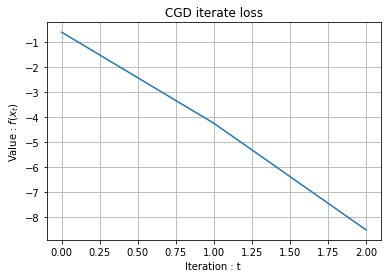

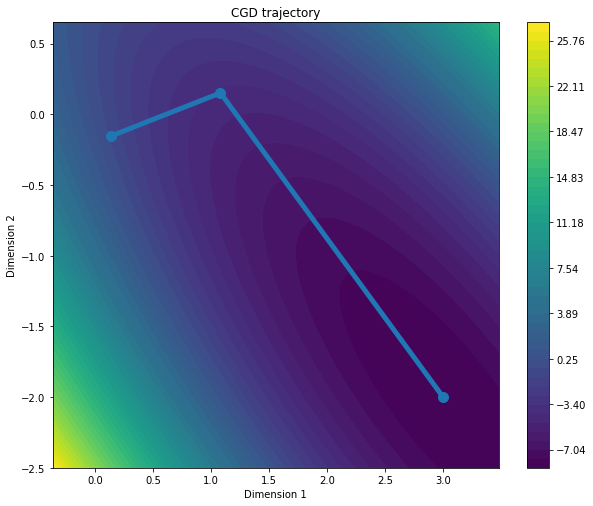

In [12]:
# Question 2, part 2

f_vals=[]
x_list=[]
d_list = []

x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1
d=-1*get_gradient(x)

f_vals = []

# 2 iterations are sufficient for convergence
# 3 iterations are used as values are appended to x_list 
# at the start of every iteration
for t in range(3):
    d_list.append(d)
    x_list.append(x)
    f_vals.append(get_value(x))    
    x, d = CG_update(x, d)
x_list = np.array(x_list)


plot_error_vs_iteration(f_vals, plt_title='CGD iterate loss')

if n_dim==2:
    plot_trajectory(x_list, plt_title='CGD trajectory')


### Testing A-orthogonality of d vectors for CGD

The orthogonality of descent directions is tested by computing $d_i^T A d_j$. Once again the values are found to be very close to zero for $i \neq j$. This illustrates A-orthogonality of the d vectors.

**NOTE:** The matrix A is being used here only for **illustrative** purposes! 

In [13]:
print("n_dim: ", n_dim)
print("")
A=np.array([[5.,4],[4.,5.]])


for i in range(len(d_list)):
    for j in range(i, len(d_list)):
        product = (np.dot(d_list[i], np.dot(A, d_list[j])))
        print("i: " + str(i), "j: " + str(j))
        print("d_i^T A d_j: ", product)
        print("")

n_dim:  2

i: 0 j: 0
d_i^T A d_j:  392.249835719691

i: 0 j: 1
d_i^T A d_j:  6.750155989720952e-14

i: 0 j: 2
d_i^T A d_j:  -2.9426613545847443e-13

i: 1 j: 1
d_i^T A d_j:  12.828548297098287

i: 1 j: 2
d_i^T A d_j:  9.084564569925002e-15

i: 2 j: 2
d_i^T A d_j:  2.271919407036515e-28



In [14]:
# Test function 3: Convex 100d- Quadratic
n_dim = 100
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    A=np.diag(np.arange(1.,n_dim+1.,1.))
    b=np.arange(1,n_dim + 1., 1.)
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(b,x)

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    A=np.diag(np.arange(1.,n_dim+1.,1.))
    b=np.arange(1,n_dim + 1., 1.)
    return np.dot(A,x) - b

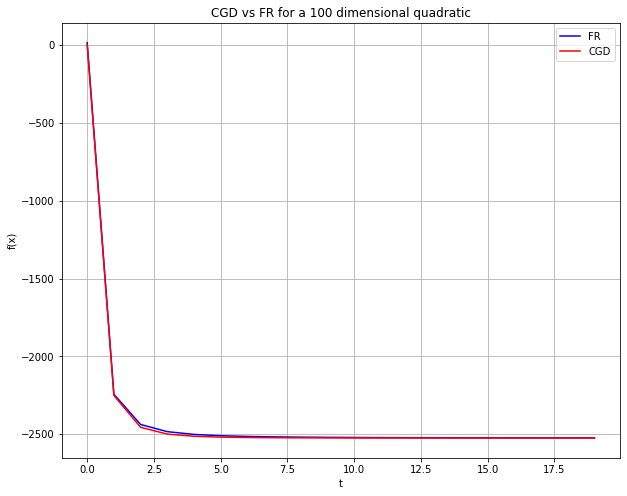

In [15]:
# Question 2, part 3

f_vals_GD=[]
x=np.random.randn(n_dim)*0.1
x_list = []
for t in range(20):
    x_list.append(x)
    f_vals_GD.append(get_value(x))
    x = gradient_descent_update_FR(x=x)

f_vals_CGD=[]
x=np.random.randn(n_dim)*0.1
d=-1*get_gradient(x)
d_list = []
for t in range(20):
    d_list.append(d)
    f_vals_CGD.append(get_value(x))
    x, d = CG_update(x,d)

plt.figure(figsize = (10,8))
plt.title("CGD vs FR for a 100 dimensional quadratic")
plt.xlabel("t")
plt.ylabel("f(x)")
plt.grid()

plt.plot(range(20),f_vals_GD, 'b-', label = "FR")
plt.plot(range(20), f_vals_CGD, 'r-', label = "CGD")
plt.legend()
plt.show()


### Testing orthogonality of successive descent directions for FR

As done for question 1, the orthogonality of descent directions is tested by computing $(x_{t+1} - x_{t})^T(x_t - x_{t-1})$. Once again the values are found to be close to zero.

In [16]:
print("Testing orthogonality of successive descent directions for FR \n")
for i in range(1,len(x_list)-1):
    prev = x_list[i]- x_list[i-1]
    after = x_list[i+1] - x_list[i]
    print("Iteration: "+ str(i), "\nInner product of descent directions: ", np.dot(prev,after)/np.linalg.norm(prev)/np.linalg.norm(after))


Testing orthogonality of successive descent directions for FR 

Iteration: 1 
Inner product of descent directions:  -3.5267739022870974e-11
Iteration: 2 
Inner product of descent directions:  2.661763754573253e-10
Iteration: 3 
Inner product of descent directions:  2.9369361598527605e-09
Iteration: 4 
Inner product of descent directions:  5.925308048734197e-09
Iteration: 5 
Inner product of descent directions:  7.7686414023154e-09
Iteration: 6 
Inner product of descent directions:  -8.250379380517434e-09
Iteration: 7 
Inner product of descent directions:  2.8926760042443724e-08
Iteration: 8 
Inner product of descent directions:  2.0973601780280767e-08
Iteration: 9 
Inner product of descent directions:  3.3226322645853145e-08
Iteration: 10 
Inner product of descent directions:  2.8544352663664684e-08
Iteration: 11 
Inner product of descent directions:  -1.2440995938953001e-07
Iteration: 12 
Inner product of descent directions:  -1.5448090451353043e-08
Iteration: 13 
Inner product of des

### Testing A-orthogonality of d vectors for CGD

As done for question 1, the orthogonality of descent directions is tested by computing $d_i^T A d_j$. Once again the values are found to be very close to zero for $i \neq j$. This illustrates A-orthogonality of the d vectors.

**NOTE:** The matrix A is being used here only for **illustrative** purposes! 

In [17]:
print(n_dim)
A=np.diag(np.arange(1.,n_dim+1.,1.))


for i in range(len(d_list)):
    for j in range(i, len(d_list)):
        product = (np.dot(d_list[i], np.dot(A, d_list[j])))
        print("i: " + str(i), "j: " + str(j))
        print("d_i^T A d_j: ", product)
        print("")

100
i: 0 j: 0
d_i^T A d_j:  24904980.75385037

i: 0 j: 1
d_i^T A d_j:  -8.731149137020111e-11

i: 0 j: 2
d_i^T A d_j:  -4.220055416226387e-10

i: 0 j: 3
d_i^T A d_j:  5.529727786779404e-10

i: 0 j: 4
d_i^T A d_j:  -3.9108272176235914e-10

i: 0 j: 5
d_i^T A d_j:  1.9372237147763371e-10

i: 0 j: 6
d_i^T A d_j:  -7.639755494892597e-11

i: 0 j: 7
d_i^T A d_j:  6.912159733474255e-11

i: 0 j: 8
d_i^T A d_j:  -7.112248567864299e-10

i: 0 j: 9
d_i^T A d_j:  9.404175216332078e-10

i: 0 j: 10
d_i^T A d_j:  -5.147740012034774e-10

i: 0 j: 11
d_i^T A d_j:  5.384208634495735e-10

i: 0 j: 12
d_i^T A d_j:  -8.735696610528976e-10

i: 0 j: 13
d_i^T A d_j:  1.1666543286992237e-09

i: 0 j: 14
d_i^T A d_j:  -1.1830252333311364e-09

i: 0 j: 15
d_i^T A d_j:  1.0320491128368303e-09

i: 0 j: 16
d_i^T A d_j:  -6.610321179323364e-10

i: 0 j: 17
d_i^T A d_j:  6.232312443898991e-10

i: 0 j: 18
d_i^T A d_j:  -5.887841325602494e-10

i: 0 j: 19
d_i^T A d_j:  8.424194675171748e-11

i: 1 j: 1
d_i^T A d_j:  1208572.737

### Question 2, part 4:

- For the given two dimensional convex quadratic function, Conjugate Gradient Descent converges in two steps. The algorithm reaches (3,-2) in  2 steps and remains there from thereon. This is expected as in this case (of a quadratic function) n = 2. The directions given by the vector **d** are shown to be A orthogonal.
- For the second function, in the case of FR, successive descent directions are once again found to be orthogonal. In the case of CGD A-orthogonality is again shown for the descent directions.
- For problem 3, the first descent step for FR and CGD are found to be the same. This is because at the first iteration we are solving the same minimisation problem.
- Observing the plot of part 3 reveals that the algorithm converges to the final value in 20 iterations and decreases very slowly thereon. For the matrix A, the ratio of $\frac{\lambda_{min}}{\lambda_{max}}$ is $\frac{1}{100}$ (A is a diagonal matrix with $A_{ii} = i$). Over 20 iterations, this reduces relative error by a factor of $2(1 - 0.1)^{40} \approx 0.02$ which explains the steep convergence.
